# <font color='blue'><center> RENAN OLIVEIRA / GUILHERME </center></font>
<center>**[renan.oliveira@databootcamp.com.br]**</center>

![alt text](https://www.phactual.com/wp-content/uploads/2014/12/tumblr_n56gr1v8cy1qgllp5o1_500.jpg)

# Estatística

## 1- Introdução e Probabilidade

### Em estatística tudo começa com PROBABILIDADE

Probabilidade é o estudo das chances de obtenção de cada resultado de um experimento aleatório.

## É de conhecimento geral que se jorgarmos uma moeda 50x ela vai cair 25x cara!
Como podemos provar isso?

In [168]:
import numpy as np #pacote numérico usado na maioria das aplicações python

In [169]:
minimo_inclusivo = 0
maximo_exclusivo = 2
total_de_resultados = 50

r = np.random.randint(minimo_inclusivo, maximo_exclusivo, total_de_resultados)
r
#esse cara retorna uma lista de Eventos com 50 valores 0 (coroa) e 1 (cara)

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0])

In [170]:
r[r == 1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

** Esse resultado é de uma Distribuição Binomial. **

Pois existem apenas dois resultados, mutualmente exclusivos e as n tentativas são *independentes*.

## <font color='blue'>Como contamos quantas vezes caiu cara? Faça :)</font>
![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

Por ser uma distribuição binomial podemos calcular o número de jogadas com sucesso (1) apenas somando todos valores

Um experimento aleatório pode ser repetido inúmeras vezes e nas mesmas condições e, mesmo assim, apresenta resultados diferentes. Cada um desses resultados possíveis é chamado de **ponto amostral**. 

In [171]:
minimo_inclusivo = 0
maximo_exclusivo = 2
total_de_resultados = 50

resultado = np.random.randint(minimo_inclusivo, maximo_exclusivo, total_de_resultados)
sum(resultado)

20

### Também podemos mostrar esse experimento de forma gráfica

In [172]:
%matplotlib inline 
#comando para dizer pro Jupyter exibir os gráficos
import seaborn as sns #pacote grafico que deixa as coisas mais bonitas :)

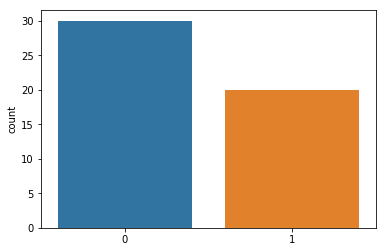

In [173]:
sns.countplot(resultado) #esse grafico pega os resultados e agrupa

### Isso que nós acabamos de fazer foi um experimento. Para diminuirmos a aleatoriedade devemos repetir esse experimento mais vezes

#### Primeiro vamos separar o código do sorteio em uma função

In [174]:
def contador_de_caras():
    resultado_das_jogadas = np.random.randint(0,2,50)
    somador = sum(resultado_das_jogadas)
    return somador

#### Agora vamos criar uma função que repita esse experimento e coloque o resultado em uma lista

In [175]:
def simulador_jogadas_de_moeda(qtd_de_experimentos):

    qtd_caras = []
    
    for repeticao in range(qtd_de_experimentos): #esse for faz ele repetir o codigo dele o numero de vezes que passamos
        jogadas = contador_de_caras()
        qtd_caras.append(jogadas) #pega o resultado da soma e inclui na lista
    
    return qtd_caras

In [176]:
simulador = simulador_jogadas_de_moeda(10)

In [177]:
simulador

[22, 24, 24, 26, 26, 23, 24, 22, 29, 24]

### Uma forma fácil de ver esse resultado é olhando os resultados de forma agrupada

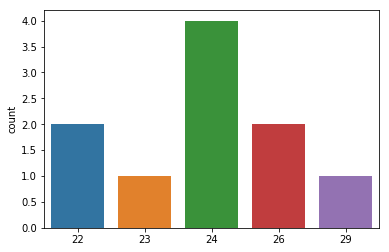

In [178]:
sns.countplot(simulador)

## <font color='blue'>Como podemos aumentar a chance de cair 25? Faça :)</font>

![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

### Devemos chamar o simulador para mais jogadas/experimentos

In [210]:
total_jogadas = 1000
simulador = simulador_jogadas_de_moeda(total_jogadas)

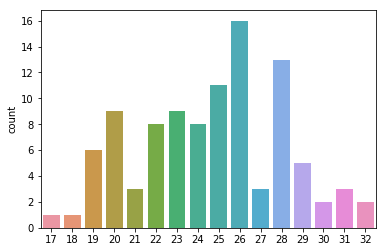

In [180]:
sns.countplot(simulador)

### Podemos usar o distplot que é uma junção do Histograma com o KDE

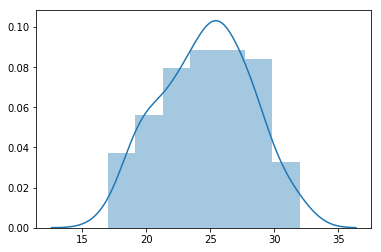

In [181]:
sns.distplot(simulador)

#### o distplot permite configurar o numero de agrupamentos, o padrão é 10

In [182]:
sns.distplot?

In [183]:
simulador[:10]

[28, 24, 23, 22, 26, 23, 30, 26, 26, 21]

## Qual a probabilidade de cair menos de 20x cara no simulador?
#### Primeiro temos que contar quantas vezes caiu menos de 20

In [184]:
menor_20 = 0
for s in simulador:
    if (s < 20):
        menor_20 += 1
menor_20

8

In [185]:
print("A probabilidade de cair um número menor que 20 é de", (menor_20/(total_jogadas/100)), "%")

A probabilidade de cair um número menor que 20 é de 8.0 %


## <font color='blue'>Qual a probabilidade de cair 3 ou 5 em um DADO de 6 lados, se lançarmos 100x? Faça :)</font>
![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

In [186]:
total_jogadas = 100
experimento_dados = np.random.randint(1,7,total_jogadas)
print("Dados do experimento", experimento_dados)

Dados do experimento [4 5 3 6 4 2 5 2 6 6 6 2 3 1 1 2 5 3 3 4 2 3 2 2 5 4 6 4 2 1 6 2 3 5 5 4 2
 2 4 1 6 1 1 6 5 1 6 5 1 5 4 6 3 1 4 1 3 2 6 2 2 5 1 5 6 1 2 3 3 1 2 2 2 1
 1 6 1 4 3 4 6 3 4 2 2 5 3 4 4 5 4 2 1 4 1 1 1 2 4 1]


In [187]:
print("Quais são as jogadas que saíram o número 3?", experimento_dados[experimento_dados==3])
print("Quais são as jogadas que saíram o número 5?", experimento_dados[experimento_dados==5])

Quais são as jogadas que saíram o número 3? [3 3 3 3 3 3 3 3 3 3 3 3 3]
Quais são as jogadas que saíram o número 5? [5 5 5 5 5 5 5 5 5 5 5 5 5]


In [188]:
quantidade = len(experimento_dados[(experimento_dados==3) | (experimento_dados==5)])
print("Quantos são os números 3 ou 5 dentro da lista:", quantidade)

Quantos são os números 3 ou 5 dentro da lista: 26


In [189]:
print("A probabilidade de cair ou o número 3 ou 5 é de", (quantidade/(total_jogadas/100)), "%")

A probabilidade de cair ou o número 3 ou 5 é de 26.0 %


------------------------
# 2- Métricas 
Nós vamos revisar as métricas e colocar algumas coisas novas na nossas análises

In [190]:
import pandas
titanic = pandas.read_csv("../../titanic.csv")

In [191]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Média Artimética

É uma medida que tenta encontrar valores centrais de uma distribuição. 

In [192]:
titanic.Age.mean()

29.69911764705882

### Vamos dar uma olhada mais a fundo pra gente revisar como as médias funcionam

É obtido somando todos os valores e dividindo pelo números de indivíduos da população.
** Ela é fortemente influenciada por valores extremos ** 

In [193]:
valores = [1,2,3,4,5,100]

def media(lista):
    return sum(lista)/len(lista)

media(valores)

19.166666666666668

## Quantil / Percentil / Mediana

São medidas que dividem a amostra ordenada (por ordem crescente dos dados). O percentil é essa medida em 100 partes.

In [194]:
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### Para pegarmos o Primeiro Quartil ou percentil 25?

In [195]:
titanic.Age.quantile(0.25)

20.125

## <font color='blue'>Como pegamos o percentil 80? Faça :)</font>
![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

In [196]:
titanic.Age.quantile(0.80)

41.0

## O percentil 50 também é chamado de MEDIANA
Ele é muito usado para encontrar um valor central da sua distribuição. ** Não sofre impacto dos valores extremos **

In [197]:
titanic.Age.quantile(0.50)

28.0

### Vamos dar uma olhada mais a fundo pra gente revisar como as mediana funcionam

![alt text](https://i.ytimg.com/vi/cVoZja1jbxM/maxresdefault.jpg)

É o valor médio de uma distribuição ordenada, no qual apresenta o mesmo número de valores abaixo e acima desse valor.
Se a distribuição tiver números ímpares ele é um único valor, se a distribuição tiver números pares é a média dos 2 valores centrais.

In [198]:
impar = [1, 10, 10, 10, 1000]

In [199]:
np.median(impar)

10.0

In [200]:
np.mean(impar)

206.19999999999999

## <font color='blue'>Qual a mediana da distribuição [1,10,20,30]? Faça :)</font>
![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

Como ela é uma distribuição par, o valor da mediana vai ser a média entre os dois elementos centrais (10,20)

In [201]:
par = [1, 10, 20, 30]
np.median(par)

15.0

### Dado um número também podemos pegar o seu percentil em uma distribuição

In [202]:
#para isso vamos precisar de um pacote novo - SciPy
from scipy import stats

In [203]:
lista = [1,2,3,4,5,6,7,8,9]
stats.percentileofscore(lista, 7, kind='mean')

72.222222222222229

### Parametros de Kind

- “rank”: Average percentage ranking of score. In case of
multiple matches, average the percentage rankings of all matching scores.
- “weak”: This kind corresponds to the definition of a cumulative
distribution function. A percentileofscore of 80% means that 80% of values are less than or equal to the provided score.
- “strict”: Similar to “weak”, except that only values that are
strictly less than the given score are counted.
- “mean”: The average of the “weak” and “strict” scores, often used in
testing. See
http://en.wikipedia.org/wiki/Percentile_rank

## BoxPlot

É um dos gráficos favoritos para analisar uma distribuição. 
Ele pega os dados que apresentamos no describe e exibe de forma gráfica

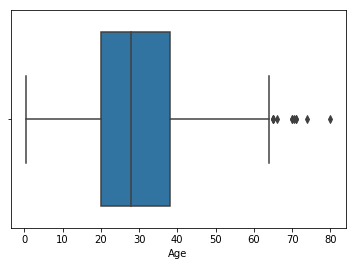

In [204]:
sns.boxplot(titanic.Age)

A interpretação do gráfico é:
- Ele exibe o valor mínimo na reta base
- Exibe os percentis 25, 50, 75 em um retangulo que é chamado de IQR (Amplitude Interquartílica)
- O percentil 90 é a reta superior
- Os pontos chamados de **outliers**

10.0

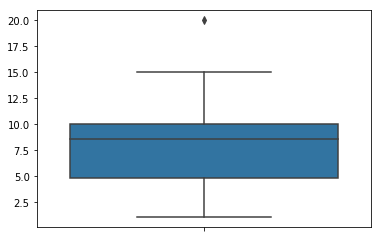

In [205]:
lista = [1,2,3,4,5,6,7,8,9,10,10,10,10,10,15,20]
sns.boxplot(lista, orient="v")
np.percentile(lista, 75)

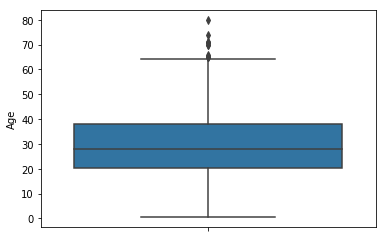

In [206]:
sns.boxplot(titanic.Age, orient="v")

## <font color='blue'>Crie um BoxPlot com o resultado do simulador de jogadas! Faça :)</font>
![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

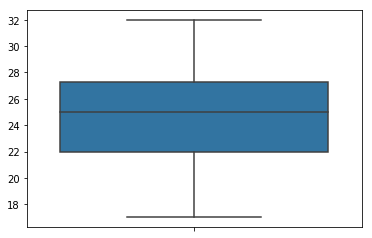

In [207]:
sns.boxplot(simulador, orient="v")

## SwarmPlot - Ele serve para monstrar a incidência de valores 

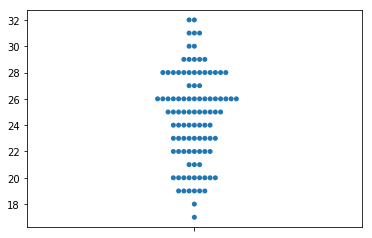

In [208]:
sns.swarmplot(simulador, orient="v")

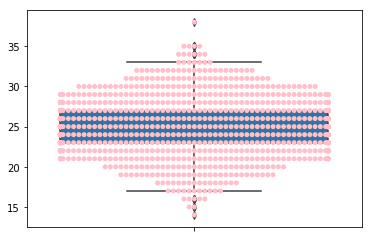

In [211]:
sns.boxplot(simulador, orient="v")
sns.swarmplot(simulador, orient="v", color="pink")